In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics


In [52]:
file=pd.read_csv(r"C:\Users\User.DESKTOP-OQ6NE4T\Desktop\archive (3)\Laptop_price.csv")
file.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [53]:
file.shape

(1000, 7)

In [54]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [55]:
file.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [56]:
file.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [57]:
print(file["Processor_Speed"].value_counts())
print(file["RAM_Size"].value_counts())
print(file["Storage_Capacity"].value_counts())
print(file["Brand"].value_counts())

Processor_Speed
3.830296    1
2.517270    1
1.575968    1
3.827372    1
3.223817    1
           ..
3.208147    1
1.690327    1
3.628017    1
2.737866    1
1.711980    1
Name: count, Length: 1000, dtype: int64
RAM_Size
32    274
8     246
4     243
16    237
Name: count, dtype: int64
Storage_Capacity
256     357
1000    336
512     307
Name: count, dtype: int64
Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64


In [58]:
# encoding
file["Brand"]=file["Brand"].map({'Dell':0,'Asus':1,'Acer':2,'Lenovo':3,'HP':4})

In [59]:
print(file["RAM_Size"].value_counts())

print(file["Brand"].value_counts())

RAM_Size
32    274
8     246
4     243
16    237
Name: count, dtype: int64
Brand
0    210
1    206
2    204
3    190
4    190
Name: count, dtype: int64


In [60]:
file.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,1,3.830296,16,512,11.185147,2.641094,17395.093065
1,2,2.912833,4,1000,11.311372,3.260012,31607.605919
2,3,3.241627,4,256,11.853023,2.029061,9291.023542
3,2,3.806248,16,512,12.280360,4.573865,17436.728334
4,2,3.268097,32,1000,14.990877,4.193472,32917.990718


In [61]:
x_features=file.drop(['Screen_Size','Weight','Price'],axis=1)
y_label=file['Price']

In [62]:
print(x_features)

     Brand  Processor_Speed  RAM_Size  Storage_Capacity
0        1         3.830296        16               512
1        2         2.912833         4              1000
2        3         3.241627         4               256
3        2         3.806248        16               512
4        2         3.268097        32              1000
..     ...              ...       ...               ...
995      4         3.343584         4              1000
996      0         2.780555         8               256
997      0         3.200569         4               512
998      1         1.604182         8               256
999      3         1.711980         4               256

[1000 rows x 4 columns]


In [63]:
x_train,x_test,y_train,y_test=train_test_split(x_features,y_label,test_size=0.5,random_state=3)

In [64]:
from sklearn.metrics import mean_squared_error

def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict = model.predict(x_train)
    ytest_predict = model.predict(x_test)

    train_error = metrics.r2_score(y_train, ytrain_predict)
    test_error = metrics.r2_score(y_test, ytest_predict)

    print("Training error (r2):", train_error)
    print("Testing error (r2):", test_error)

    # Scatter plot for training and testing predictions
    plt.scatter(y_train, ytrain_predict, marker='o', label='Train Predictions')
    plt.scatter(y_test, ytest_predict, marker='^', label='Test Predictions')
    plt.plot([min(y_train),max(y_train)],[min(y_train),max(y_train)],color='red',linewidth=3,label='Ideal Fit')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True vs Predicted Values')
    plt.legend()
    plt.show()

    print("Coefficients:")
    print(coefs,"\n")

In [65]:
LR_model=LinearRegression()

In [66]:
LR_model.fit(x_train,y_train)

LinearRegression()

Training error (r2): 0.9995749452854894
Testing error (r2): 0.9995255097562085


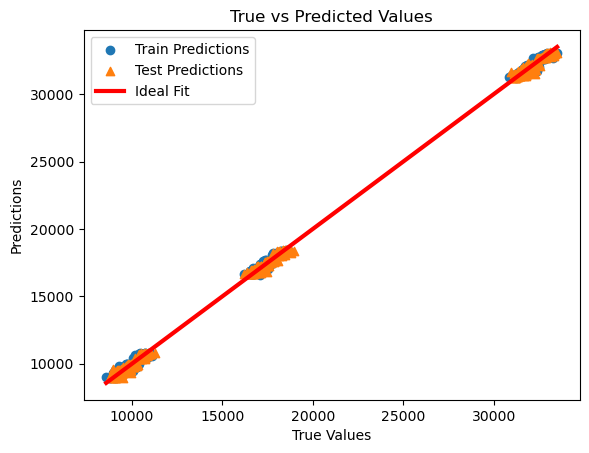

Coefficients:
[766.659242960297, 2.3466249863489863, 191.77145272762897, 49.624936008046284, 29.96898091082707] 



In [67]:
display_results(LR_model)

Training error (r2): 0.9995749160486782
Testing error (r2): 0.9995252361281942


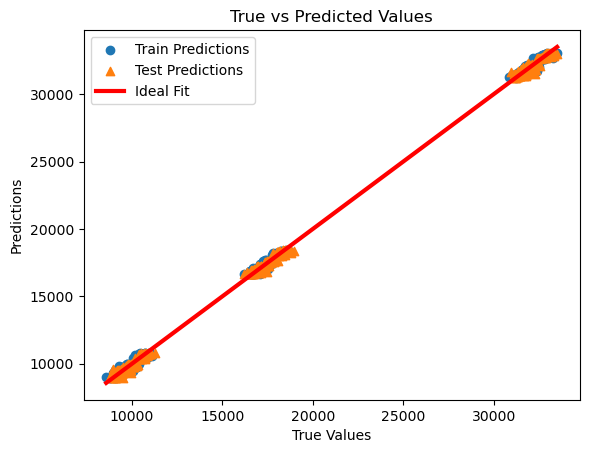

Coefficients:
[773.7056759582083, 1.7957134016481247, 189.73527239446724, 49.60899864687362, 29.968707141924] 



In [68]:
lass_regression_model=Lasso()
lass_regression_model.fit(x_train,y_train)
display_results(lass_regression_model)